CLASIFICACIÓN CANCER DE MAMA CON EL MODELO PRE-ENTRENADO    VGG16

In [1]:
import tensorflow as tf
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import random
import warnings 
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
import imblearn
from imblearn.over_sampling import RandomOverSampler
warnings.filterwarnings('ignore')                    # Turn the warnings off.
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Set batch size for training and validation
batch_size = 32

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
os.chdir('C:\\Users\\Indiaka.TORRE-DAVID\\Desktop\Datos')

In [5]:
#os.chdir('/content/drive/MyDrive/Datos')

In [6]:
BC_df_copy = pd.read_csv('C:\\Users\\Indiaka.TORRE-DAVID\\Desktop\Datos\\Breat_cancer_data.csv')
BC_df_copy.head()

,Unnamed: 0,patient_ID,pathes,diagnosis
0,0,10253,C:\Users\Indiaka.TORRE-DAVID\Desktop\Datos\can...,0
1,1,10253,C:\Users\Indiaka.TORRE-DAVID\Desktop\Datos\can...,0
2,2,10253,C:\Users\Indiaka.TORRE-DAVID\Desktop\Datos\can...,0
3,3,10253,C:\Users\Indiaka.TORRE-DAVID\Desktop\Datos\can...,0
4,4,10253,C:\Users\Indiaka.TORRE-DAVID\Desktop\Datos\can...,0


In [7]:
BC_df_copy = BC_df_copy.sort_values('patient_ID')

In [8]:
BC_df_copy.iloc[1400:1401,:]

,Unnamed: 0,patient_ID,pathes,diagnosis
1580,1580,10255,C:\Users\Indiaka.TORRE-DAVID\Desktop\Datos\can...,1


In [9]:
from PIL.Image import open
BC_df_copy['pixels'] =  BC_df_copy['pathes'].map(lambda x:np.asarray(open(x).resize((224,224))))

In [10]:
BC_df_copy['diagnosisPaciente'] = BC_df_copy['diagnosis'].map(str) + "_" + BC_df_copy['patient_ID'].map(str)

**CREACIÓN DE LOS CONJUNTOS DE DATOS**

In [11]:
X = BC_df_copy['pixels']
y = np.array(BC_df_copy['diagnosis'])

In [12]:
X_train = X[0:1397]
X_validation = X[1397:1669]
X_test = X[1669:2137]
y_train =BC_df_copy['diagnosisPaciente'][0:1397]
y_validation = y[1397:1669]
y_test = y[1669:2137]
C_validation = BC_df_copy['patient_ID'][1397:1669]

print('La dimension de X_train :'+" "+str(X_train.shape))
print('La dimension de X_validation :'+" "+str(X_validation.shape))
print('La dimension de X_test :'+" "+str(X_test.shape))
print('La dimension de y_train :'+" "+str(y_train.shape))
print('La dimension de y_validation :'+" "+str(y_validation.shape))
print('La dimension de y_test :'+" "+str(y_test.shape))

La dimension de X_train : (1397,)
La dimension de X_validation : (272,)
La dimension de X_test : (468,)
La dimension de y_train : (1397,)
La dimension de y_validation : (272,)
La dimension de y_test : (468,)


In [13]:
#información relevante
num_train = len((X_train))
num_validation = len((X_validation))
num_test = len((X_test))
num_classes = 2
num_iterations = int(num_train/batch_size)

# Print important info
print(f'Numero de imágenes para train: {num_train} \
        \nNumero de imágenes para validation: {num_validation} \
        \nNumero de imágenes para test: {num_test} \
        \nNumero de clases: {num_classes} \
        \nNumero de iteraciones por época: {num_iterations}')

Numero de imágenes para train: 1397         
Numero de imágenes para validation: 272         
Numero de imágenes para test: 468         
Numero de clases: 2         
Numero de iteraciones por época: 43


In [14]:
# training set
img_list = []
for i in range (0,len(X_train)):
    brain_img =np.array(X_train)[i]
    img_arr = img_to_array(brain_img/255).astype(np.float32)
    img_list.append(img_arr)
X_scaled = np.array(img_list)

print(X_scaled.shape)

(1397, 224, 224, 3)


In [15]:
# validation set
img_validation = []
for i in range (0,len(X_validation)):
    brain_img_validation =np.array(X_validation)[i]
    img_validation_arr = img_to_array(brain_img_validation/255).astype(np.float32)
    img_validation.append((img_validation_arr))
X_scaled_validation = np.array(img_validation)

print(X_scaled_validation.shape)

(272, 224, 224, 3)


In [16]:
# test set
img_test = []
for i in range (0,len(X_test)):
    brain_img_test =np.array(X_test)[i]
    img_test_arr = img_to_array(brain_img_test/255).astype(np.float32)
    img_test.append((img_test_arr))
X_scaled_test = np.array(img_test)

print(X_scaled_test.shape)

(468, 224, 224, 3)


****Balanceo de datos para el train set****

In [17]:
X_train_shape = X_scaled.shape[1]*X_scaled.shape[2]*X_scaled.shape[3]
X_Flatten = X_scaled.reshape(X_scaled.shape[0],X_train_shape)

In [18]:
ros = RandomOverSampler(random_state=10)
X_train_res, y_train = ros.fit_resample(X_Flatten, y_train)

In [19]:
row,col,channel = 224 ,224 , 3 
X_scaled = X_train_res.reshape(len(X_train_res),row,col,channel)
# chec the shape of our training set
print('The shape of the training set after reshape it :'+" "+str(X_scaled.shape))

The shape of the training set after reshape it : (3088, 224, 224, 3)


Separar los campos en diagnosis y codigo paciente

In [20]:
C_train = y_train.str.split("_",1).str[1]

In [21]:
y_train = y_train.str.split("_",1).str[0]

Unir los conjuntos de train y validation para hacer posteriormente el k-fold



In [22]:
C_total = np.concatenate((C_train,C_validation), axis =0)

In [23]:
C_total = np.array(C_total).astype(int)

In [24]:
y_train = np.concatenate((y_train,y_validation), axis =0)

In [25]:
X_scaled = np.concatenate((X_scaled,X_scaled_validation), axis =0)

**one-hot-encoding**

In [26]:
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)
print(y_train.shape)
print(y_test.shape)

(3360, 2)
(468, 2)


**CREACIÓN y ENTRENAMIENTO DEL MODELO**

In [27]:
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.vgg16 import VGG16

In [28]:
from sklearn.model_selection import GroupKFold

In [29]:
input_shape=(224,224,3)
validation_processed = (X_scaled_validation,y_validation)
epocas = 24
learn_rate = 0.0002

In [30]:
pre_trained_model = VGG16(include_top=False, weights="imagenet", pooling='avg', input_shape=input_shape)
pre_trained_model.trainable = False

In [31]:
my_optimizer=Adam(lr=learn_rate)

In [34]:
clasificacion_model = tf.keras.models.Sequential()
clasificacion_model.add(pre_trained_model)
clasificacion_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
clasificacion_model.compile(optimizer = my_optimizer,loss='binary_crossentropy', metrics=['accuracy'])
groups = C_total
group_kfold = GroupKFold(n_splits= 3)
cvscores = []
for train,validacion  in group_kfold.split(X_scaled,y_train, groups):
  historia = clasificacion_model.fit(X_scaled[train],y_train[train], epochs=epocas, batch_size=batch_size, verbose=2)
  resTest = clasificacion_model.evaluate(X_scaled[validacion], y_train[validacion], verbose = 0)
  print("%s: %.2f%%" % (clasificacion_model.metrics_names[1], resTest[1]*100))
  cvscores.append(resTest[1]*100)
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Train on 1816 samples
Epoch 1/24
1816/1816 - 74s - loss: 0.6806 - accuracy: 0.5661
Epoch 2/24
1816/1816 - 73s - loss: 0.6274 - accuracy: 0.7054
Epoch 3/24
1816/1816 - 73s - loss: 0.5818 - accuracy: 0.8023
Epoch 4/24
1816/1816 - 73s - loss: 0.5438 - accuracy: 0.8546
Epoch 5/24
1816/1816 - 72s - loss: 0.5102 - accuracy: 0.8634
Epoch 6/24
1816/1816 - 74s - loss: 0.4817 - accuracy: 0.8612
Epoch 7/24
1816/1816 - 77s - loss: 0.4574 - accuracy: 0.8888
Epoch 8/24
1816/1816 - 75s - loss: 0.4361 - accuracy: 0.8893
Epoch 9/24
1816/1816 - 74s - loss: 0.4173 - accuracy: 0.8970
Epoch 10/24
1816/1816 - 74s - loss: 0.4012 - accuracy: 0.9003
Epoch 11/24
1816/1816 - 73s - loss: 0.3873 - accuracy: 0.9009
Epoch 12/24
1816/1816 - 73s - loss: 0.3746 - accuracy: 0.8992
Epoch 13/24
1816/1816 - 75s - loss: 0.3632 - accuracy: 0.9014
Epoch 14/24
1816/1816 - 74s - loss: 0.3534 - accuracy: 0.9003
Epoch 15/24
1816/1816 - 74s - loss: 0.3441 - accuracy: 0.8987
Epoch 16/24
1816/1816 - 73s - loss: 0.3360 - accuracy: 0.

In [35]:
cvscores

[85.23315787315369, 78.62694263458252, 79.77941036224365]

**GRÁFICAS. Evaluación de los resultados con el conjunto de validación**

In [36]:
accuracy_validation = historia.history['val_accuracy'][-1]
accuracy_validation

KeyError: 'val_accuracy'

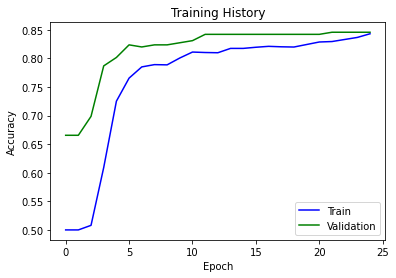

In [ ]:
# Gráfica para visualizar el resultado del entrenamiento del modelo. 
n_skip = 0                 # Skip the first few steps.
plt.plot(historia.history['accuracy'][n_skip:], c="b")
plt.plot(historia.history['val_accuracy'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

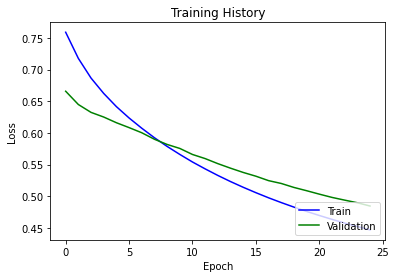

In [ ]:
# Gráfica para visualizar el resultado del entrenamiento del modelo. 
n_skip = 0                 # Skip the first few steps.
plt.plot(historia.history['loss'][n_skip:], c="b")
plt.plot(historia.history['val_loss'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

**MÉTRICAS. Evaluación de los resultados con el conjunto de test**

In [37]:
from sklearn.metrics import classification_report , confusion_matrix, multilabel_confusion_matrix

In [38]:
eval_score = clasificacion_model.evaluate(X_scaled_test,y_test)
print('loss en la evaluacion :'+' '+str(eval_score[0]*100))
print('accuracy en la evaluacion :'+' '+str(eval_score[1]*100))

468/468 [==============================] - 19s 40ms/sample - loss: 0.3369 - accuracy: 0.8526
loss en la evaluacion : 33.685449453500595
accuracy en la evaluacion : 85.25640964508057


In [39]:
y_pred = clasificacion_model.predict(X_scaled_test)
y_pred = np.round(y_pred).astype(int)

In [40]:
target_name = ['benigno','maligno']
classification_report(y_true=y_test , y_pred=y_pred , output_dict=True , target_names= target_name )

{'benigno': {'precision': 0.9433962264150944,
  'recall': 0.8547008547008547,
  'f1-score': 0.8968609865470852,
  'support': 351},
 'maligno': {'precision': 0.66,
  'recall': 0.8461538461538461,
  'f1-score': 0.7415730337078651,
  'support': 117},
 'micro avg': {'precision': 0.8525641025641025,
  'recall': 0.8525641025641025,
  'f1-score': 0.8525641025641025,
  'support': 468},
 'macro avg': {'precision': 0.8016981132075471,
  'recall': 0.8504273504273504,
  'f1-score': 0.8192170101274752,
  'support': 468},
 'weighted avg': {'precision': 0.8725471698113206,
  'recall': 0.8525641025641025,
  'f1-score': 0.85803899833728,
  'support': 468},
 'samples avg': {'precision': 0.8525641025641025,
  'recall': 0.8525641025641025,
  'f1-score': 0.8525641025641025,
  'support': 468}}

**matriz de confusión**

In [ ]:
import seaborn as sns

In [ ]:
(multilabel_confusion_matrix(y_test,y_pred))

array([[[104,  13],
        [100, 251]],

       [[251, 100],
        [ 13, 104]]])

**guardar modelo**

In [41]:
clasificacion_model.save('vgg16_k-fold.h5')

In [ ]:
new_model = tf.keras.models.load_model('vgg16_8431_no_hot_encoding.h5')

**predicciones**